In [1]:
import pandas as pd

# Load the first dataset
df_match_winner = pd.read_csv('Match Winner.csv')

unwanted_cols = ['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts', 'ATFormsPts', 'HTWinStreak3' ,'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5']
df_match_winner_cleaned = df_match_winner.drop(columns=unwanted_cols, errors='ignore') # Note: I changed df_goals_cleaned to df_match_cleaned
df_match_winner_cleaned.head()
# print("\nThis is the NEW, CLEANED dataframe:")
# print(df_match_winner_cleaned.head())

,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,...,AM1,AM2,AM3,AM4,AM5,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts
0,H,0,0,0,0,0.0,0.0,M,M,M,...,M,M,M,M,M,0,0.0,0.0,0.0,0.0
1,H,0,0,0,0,0.0,0.0,M,M,M,...,M,M,M,M,M,0,0.0,0.0,0.0,0.0
2,NH,0,0,0,0,0.0,0.0,M,M,M,...,M,M,M,M,M,0,0.0,0.0,0.0,0.0
3,NH,0,0,0,0,0.0,0.0,M,M,M,...,M,M,M,M,M,0,0.0,0.0,0.0,0.0
4,H,0,0,0,0,0.0,0.0,M,M,M,...,M,M,M,M,M,0,0.0,0.0,0.0,0.0


In [3]:
df_match_winner_cleaned.columns
df_match_winner_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FTR          6840 non-null   object 
 1   HTGS         6840 non-null   int64  
 2   ATGS         6840 non-null   int64  
 3   HTGC         6840 non-null   int64  
 4   ATGC         6840 non-null   int64  
 5   HTP          6840 non-null   float64
 6   ATP          6840 non-null   float64
 7   HM1          6840 non-null   object 
 8   HM2          6840 non-null   object 
 9   HM3          6840 non-null   object 
 10  HM4          6840 non-null   object 
 11  HM5          6840 non-null   object 
 12  AM1          6840 non-null   object 
 13  AM2          6840 non-null   object 
 14  AM3          6840 non-null   object 
 15  AM4          6840 non-null   object 
 16  AM5          6840 non-null   object 
 17  ATFormPts    6840 non-null   int64  
 18  HTGD         6840 non-null   float64
 19  ATGD  

In [21]:
df_match_winner_cleaned.isnull().sum()

FTR            0
HTGS           0
ATGS           0
HTGC           0
ATGC           0
HTP            0
ATP            0
HM1            0
HM2            0
HM3            0
HM4            0
HM5            0
AM1            0
AM2            0
AM3            0
AM4            0
AM5            0
ATFormPts      0
HTGD           0
ATGD           0
DiffPts        0
DiffFormPts    0
dtype: int64

In [9]:
df_match_winner_cleaned.describe()
df_match_winner_cleaned.to_excel('cleaned_match_winner_data.xlsx', index=False)

In [5]:
goals_scored = df_match_winner_cleaned.HTGS.value_counts()

In [28]:
print("\nDropping duplicates...")
df_match_winner_cleaned = df_match_winner_cleaned.drop_duplicates()
print(f"Match data new duplicate count: {df_match_winner_cleaned.duplicated().sum()}")


Dropping duplicates...
Match data new duplicate count: 0


Plotting boxplots for all 11 numeric columns in df_league:



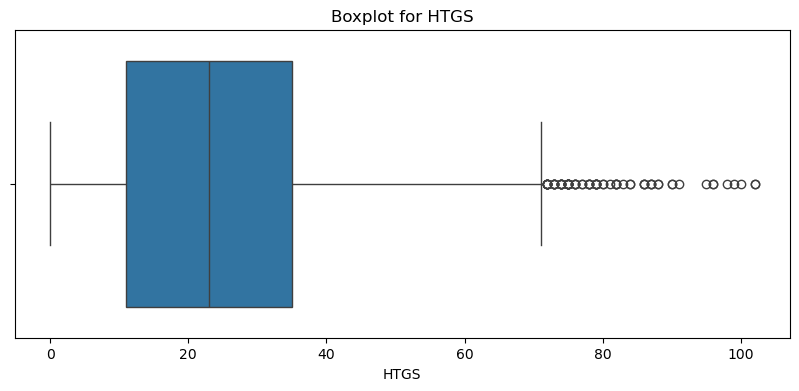

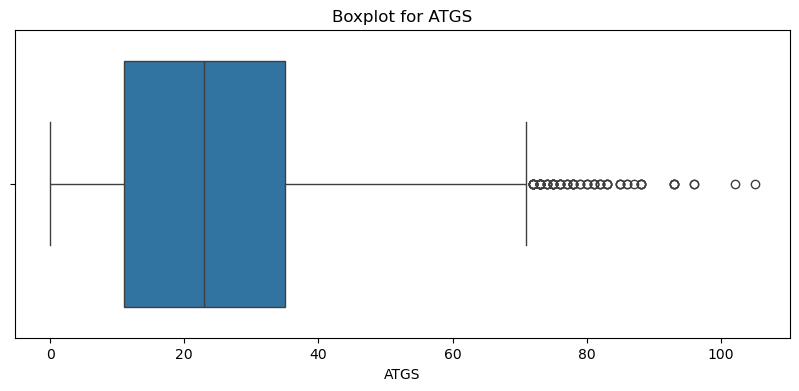

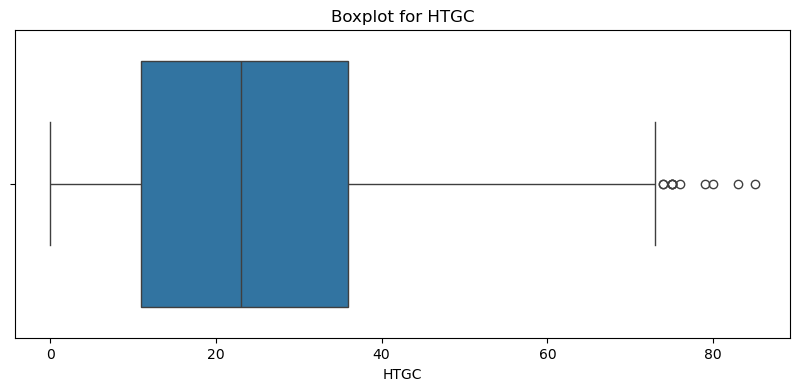

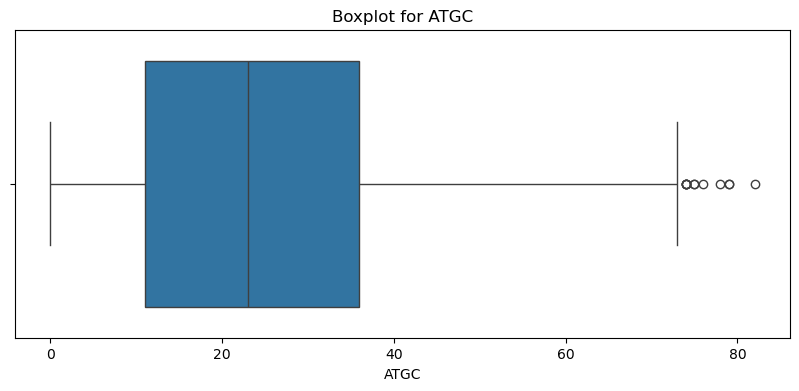

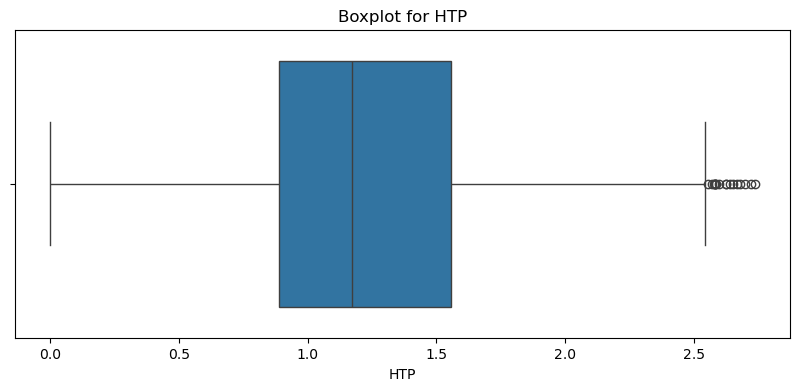

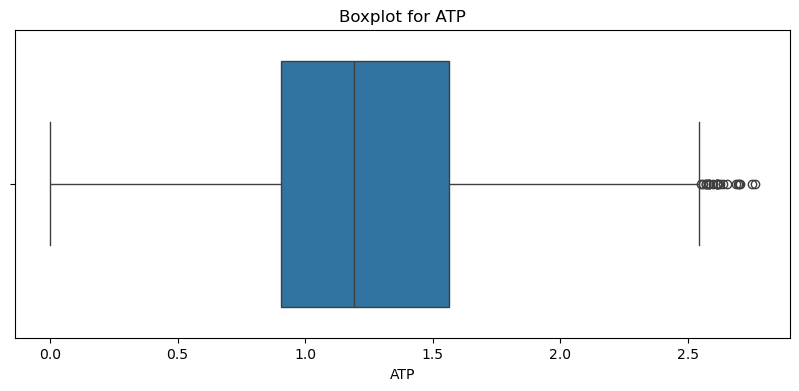

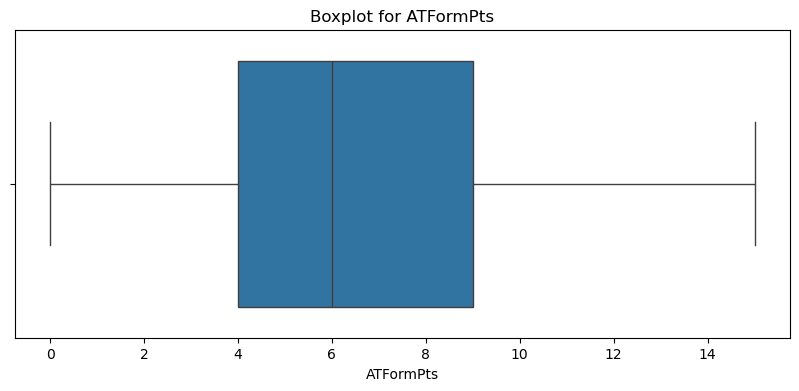

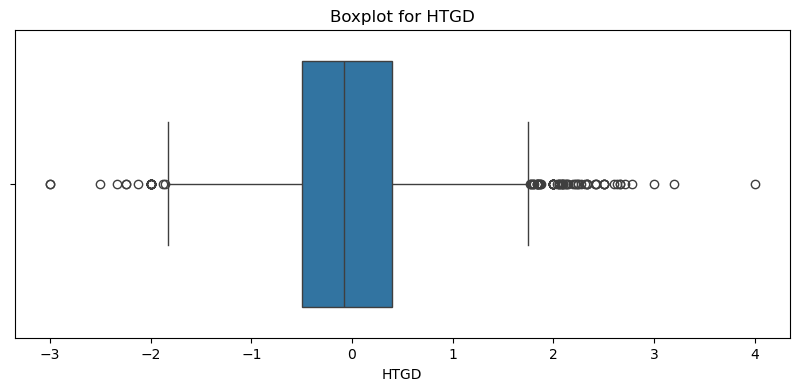

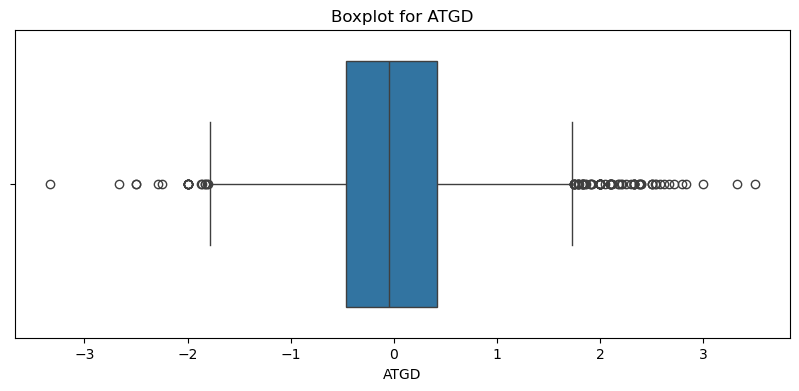

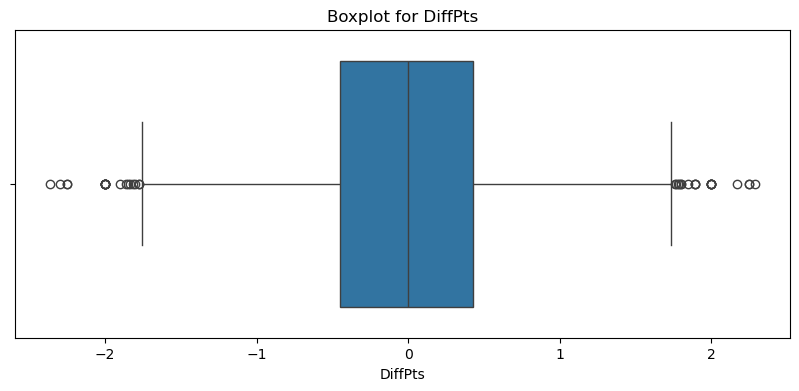

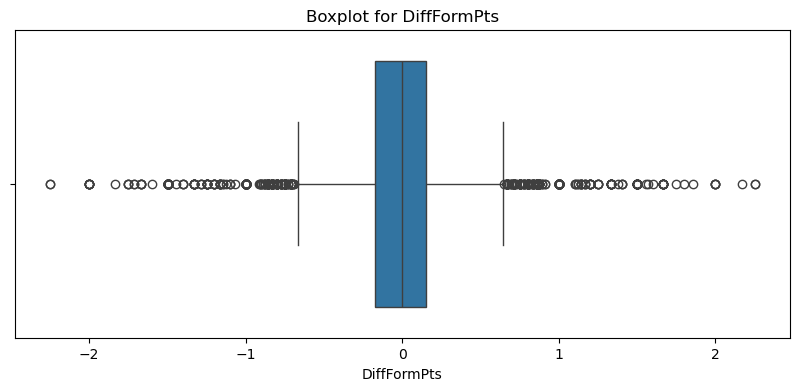


--- All numeric columns have been plotted. ---


In [6]:
import numpy as np
import matplotlib.pyplot as plt  # <-- Add this line
import seaborn as sns            # <-- Add this line

# Get a list of all columns that are numbers (int64 or float64)
# Make sure you are using the correct DataFrame name!
# I'm using 'df_league' from our previous examples.
numeric_cols = df_match_winner_cleaned.select_dtypes(include=[np.number]).columns

print(f"Plotting boxplots for all {len(numeric_cols)} numeric columns in df_league:\n")

# Loop through each numeric column
for col in numeric_cols:
    plt.figure(figsize=(10, 4)) # Create a new figure for each plot
    sns.boxplot(x=df_match_winner_cleaned[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

print("\n--- All numeric columns have been plotted. ---")

In [11]:
import pandas as pd
import numpy as np

def remove_outliers_iqr_targeted(df, columns_to_check):
    """
    Removes outliers from a DataFrame based on the IQR rule,
    but only for the columns specified in columns_to_check.
    A row is kept ONLY if it is within the IQR bounds for ALL specified columns.
    """
    df_original = df.copy()
    df_filtered = df.copy()
    
    print(f"Original shape: {df_original.shape}")
    
    for col in columns_to_check:
        print(f"...Applying IQR trimming for '{col}'")
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        
        # Keep rows that are WITHIN the bounds for this column
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & 
                                  (df_filtered[col] <= upper_bound)]
    
    print(f"\nNew shape after trimming: {df_filtered.shape}")
    print(f"Total rows removed: {df_original.shape[0] - df_filtered.shape[0]}")
    return df_filtered

# --- Main script ---
print("--- Processing Match Winner Data ---")
try:
    # 1. Load data
    # --- FIX: Changed from read_csv to read_excel ---
    df_match = pd.read_excel("cleaned_match_winner_data.xlsx")
    print(f"Loaded {df_match.shape[0]} rows from cleaned_match_winner_data.xlsx")

    # 2. Drop duplicates
    df_match_cleaned = df_match.drop_duplicates()
    print(f"Shape after dropping duplicates: {df_match_cleaned.shape}")
    
    # 3. Define columns to trim
    cols_to_trim_match = [
        'HTGD', 
        'ATGD', 
        'DiffPts', 
        'DiffFormPts'
    ]
    
    # 4. Apply the targeted outlier removal
    df_match_trimmed = remove_outliers_iqr_targeted(df_match_cleaned, cols_to_trim_match)
    
    # 5. Save to Excel
    match_excel_filename = "match_data_trimmed_outliers.xlsx"
    df_match_trimmed.to_excel(match_excel_filename, index=False)
    
    print(f"\nSuccessfully saved processed data to: {match_excel_filename}")

except FileNotFoundError:
    # --- FIX: Updated error message to match the new file name ---
    print("Error: 'cleaned_match_winner_data.xlsx' not found.")
    print("Please make sure you have successfully run the cell that *creates* this file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Processing Match Winner Data ---
Loaded 6840 rows from cleaned_match_winner_data.xlsx
Shape after dropping duplicates: (6639, 22)
Original shape: (6639, 22)
...Applying IQR trimming for 'HTGD'
...Applying IQR trimming for 'ATGD'
...Applying IQR trimming for 'DiffPts'
...Applying IQR trimming for 'DiffFormPts'

New shape after trimming: (5957, 22)
Total rows removed: 682

Successfully saved processed data to: match_data_trimmed_outliers.xlsx


In [1]:
import pandas as pd
import numpy as np

# --- Main script ---
print("--- Categorical Analysis for Trimmed Match Data ---")


try:
    # 1. Analyze 'FTR' (Full Time Result)
    print("Unique 'FTR' values and their counts (from trimmed data):")
    print(df_match_trimmed['FTR'].value_counts())
    print("\n")

    # 2. Analyze 'HM1' (Home Match 1 Result)
    print("Unique 'HM1' values and their counts:")
    print(df_match_trimmed['HM1'].value_counts())
    print("\n")

    # 3. Analyze 'AM1' (Away Match 1 Result)
    print("Unique 'AM1' values and their counts:")
    print(df_match_trimmed['AM1'].value_counts())
    print("\n")

    # You can add more value_counts() for HM2, HM3, etc. if needed
    
    print("--- Match categorical analysis complete ---")

except NameError:
    print("Error: 'df_match_trimmed' not found.")
    print("Please run the 'process_match_data.py' script in a cell above this one first,")
    print("or load the 'match_data_trimmed_outliers.xlsx' file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Categorical Analysis for Trimmed Match Data ---
Unique 'FTR' values and their counts (from trimmed data):
Error: 'df_match_trimmed' not found.
Please run the 'process_match_data.py' script in a cell above this one first,
or load the 'match_data_trimmed_outliers.xlsx' file.


--- Match Data: Relationship Analysis ---
Loaded 'match_data_trimmed_outliers.xlsx': (5957, 22)

--- Correlation Matrix (Trimmed Match Data) ---


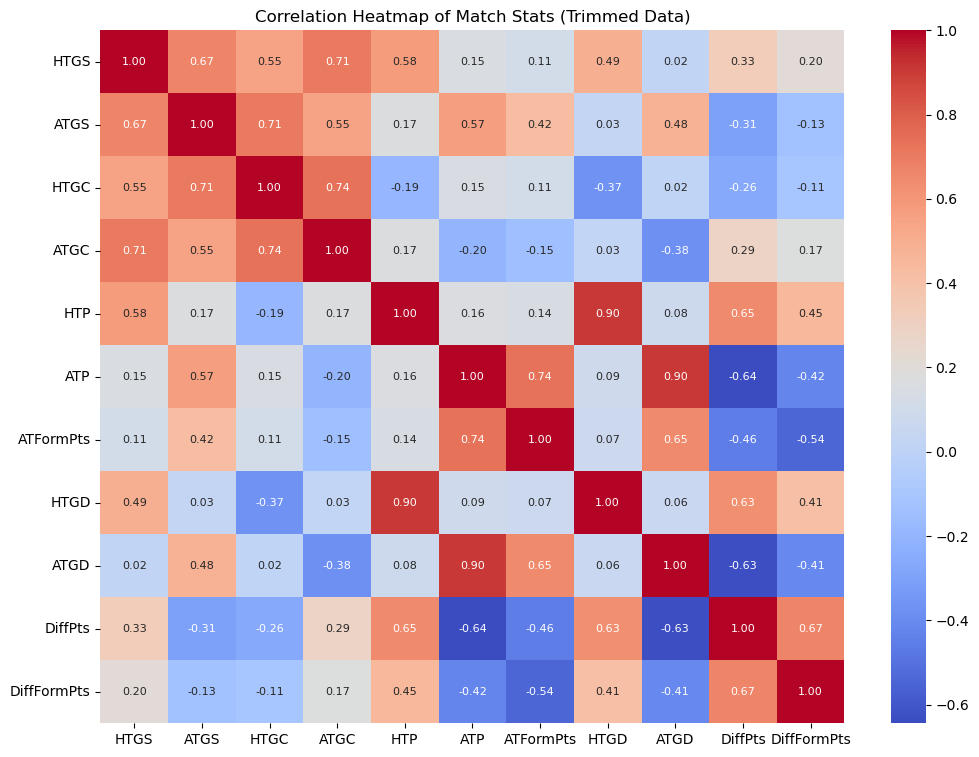


--- Average Match Stats by Full Time Result (FTR) ---
      DiffPts      HTGD      ATGD  DiffFormPts
FTR                                           
H    0.180383  0.124839 -0.156698     0.041957
NH  -0.177820 -0.159861  0.110794    -0.060377

--- Impact of Home Team's Last Match (HM1) on Result (FTR) ---
FTR       H      NH
HM1                
D    40.93%  59.07%
L     41.0%   59.0%
W    57.48%  42.52%

--- Match relationship analysis complete ---


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Main script ---
print("--- Match Data: Relationship Analysis ---")

try:
    # 1. Load the data you just analyzed
    df_match_trimmed = pd.read_excel("match_data_trimmed_outliers.xlsx")
    print(f"Loaded 'match_data_trimmed_outliers.xlsx': {df_match_trimmed.shape}")

    # 2. Correlation Matrix
    print("\n--- Correlation Matrix (Trimmed Match Data) ---")
    
    # Select only numeric columns
    numeric_cols = df_match_trimmed.select_dtypes(include=[np.number])
    corr_matrix = numeric_cols.corr()
    
    # Create a heatmap
    plt.figure(figsize=(12, 9))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                annot_kws={"size": 8})
    plt.title('Correlation Heatmap of Match Stats (Trimmed Data)')
    plt.show()

    # 3. Categorical vs. Numeric (Grouped Averages)
    print("\n--- Average Match Stats by Full Time Result (FTR) ---")
    # Group by 'FTR' and get the average of the most important predictive features
    key_features = ['DiffPts', 'HTGD', 'ATGD', 'DiffFormPts']
    print(df_match_trimmed.groupby('FTR')[key_features].mean())

    # 4. Categorical vs. Categorical (Cross-Tabulation)
    print("\n--- Impact of Home Team's Last Match (HM1) on Result (FTR) ---")
    
    # We filter out 'M' (Missing/Start of Season) as it's not meaningful 'form'
    form_data = df_match_trimmed[df_match_trimmed['HM1'] != 'M']
    
    # Create a cross-tabulation and normalize by 'index' (by row) to get percentages
    # This shows "Given the HM1 result, what % of time did FTR=H or FTR=NH occur?"
    cross_tab = pd.crosstab(form_data['HM1'], form_data['FTR'], normalize='index')
    
    # Format as percentage
    print(cross_tab.mul(100).round(2).astype(str) + '%')

    print("\n--- Match relationship analysis complete ---")

except FileNotFoundError:
    print("Error: 'match_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_match_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [15]:
df_match_trimmed.to_excel('match_data_trimmed_outliers.xlsx', index=False)

--- Building Classification Model for 'Match Winner (FTR)' ---
Loaded 'match_data_trimmed_outliers.xlsx': (5957, 22)
Feature engineering complete. All text columns converted to numbers.
Training data shape: (4765, 41)
Testing data shape: (1192, 41)

Training RandomForestClassifier model...
Model training complete.

--- Model Evaluation (Classification) ---
Model Accuracy: 63.84%

--- Classification Report ---
              precision    recall  f1-score   support

      NH (0)       0.64      0.74      0.69       639
       H (1)       0.63      0.53      0.57       553

    accuracy                           0.64      1192
   macro avg       0.64      0.63      0.63      1192
weighted avg       0.64      0.64      0.63      1192


--- Top 10 Most Important Features ---
        Feature  Importance
9       DiffPts    0.087811
8          ATGD    0.083635
7          HTGD    0.081712
4           HTP    0.077854
5           ATP    0.074692
10  DiffFormPts    0.069276
0          HTGS    0.064

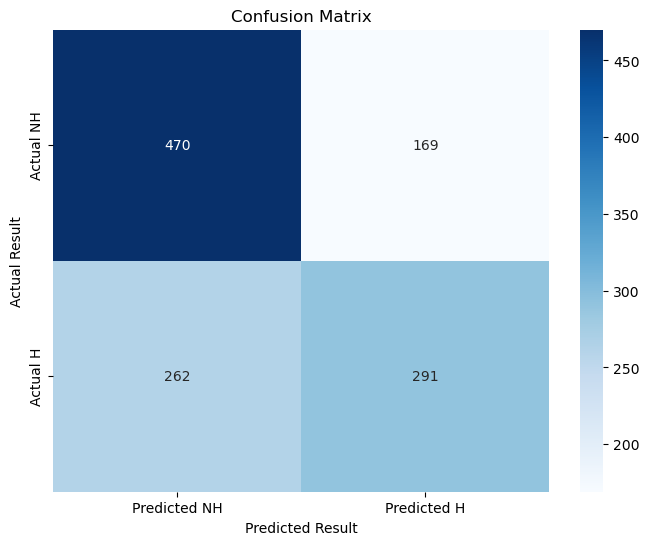

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Main script ---
print("--- Building Classification Model for 'Match Winner (FTR)' ---")

try:
    # 1. Load the trimmed data
    df = pd.read_excel("match_data_trimmed_outliers.xlsx")
    print(f"Loaded 'match_data_trimmed_outliers.xlsx': {df.shape}")

    # 2. Feature Engineering: Convert ALL categorical columns to numbers
    # We must one-hot encode all the 'HM' and 'AM' form columns,
    # as well as 'FTR' (which is our target).
    
    # First, let's create our target, 'y'
    # We'll map 'H' (Home Win) to 1 and 'NH' (Not Home Win) to 0
    df['FTR_numeric'] = df['FTR'].map({'H': 1, 'NH': 0})
    y = df['FTR_numeric']
    
    # Now, let's create our features, 'X'
    # We drop the original 'FTR' and our new target 'FTR_numeric'
    X = df.drop(columns=['FTR', 'FTR_numeric'])
    
    # One-hot encode all remaining text columns (HM1, AM1, etc.)
    X_processed = pd.get_dummies(X, drop_first=True)
    
    print("Feature engineering complete. All text columns converted to numbers.")

    # 3. Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")

    # 4. Train the Model (Using a Classifier)
    print("\nTraining RandomForestClassifier model...")
    # n_estimators=100 means it uses 100 "decision trees"
    model_match = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    model_match.fit(X_train, y_train)
    print("Model training complete.")

    # 5. Make Predictions on the Test Set
    y_pred = model_match.predict(X_test)
    
    # 6. Evaluate the Model
    print("\n--- Model Evaluation (Classification) ---")
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    
    # Full Classification Report (Precision, Recall, F1-Score)
    print("\n--- Classification Report ---")
    # '0' is 'NH' (Not Home Win), '1' is 'H' (Home Win)
    print(classification_report(y_test, y_pred, target_names=['NH (0)', 'H (1)']))

    # 7. Feature Importance (The "Why")
    print("\n--- Top 10 Most Important Features ---")
    importances = model_match.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    print(importance_df.head(10))

    # 8. Visual Evaluation: Confusion Matrix
    print("\nPlotting Confusion Matrix...")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted NH', 'Predicted H'], 
                yticklabels=['Actual NH', 'Actual H'])
    plt.ylabel('Actual Result')
    plt.xlabel('Predicted Result')
    plt.title('Confusion Matrix')
    plt.show()

except FileNotFoundError:
    print("Error: 'match_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_match_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Building Logistic Regression Model for 'Match Winner (FTR)' ---
Loaded 'match_data_trimmed_outliers.xlsx': (5957, 22)
Feature engineering complete.
Training data shape: (4765, 41)
Testing data shape: (1192, 41)
Data has been scaled for the Logistic Regression model.

Training LogisticRegression model...
Model training complete.

--- Model Evaluation (Logistic Regression) ---
Model Accuracy: 65.52%

--- Classification Report ---
              precision    recall  f1-score   support

      NH (0)       0.66      0.73      0.69       639
       H (1)       0.65      0.57      0.60       553

    accuracy                           0.66      1192
   macro avg       0.65      0.65      0.65      1192
weighted avg       0.65      0.66      0.65      1192


--- Top 10 Most Important Features (Coefficients) ---
        Feature  Coefficient  Absolute_Coefficient
7          HTGD     0.288105              0.288105
8          ATGD    -0.276217              0.276217
13        HM1_W     0.270380 

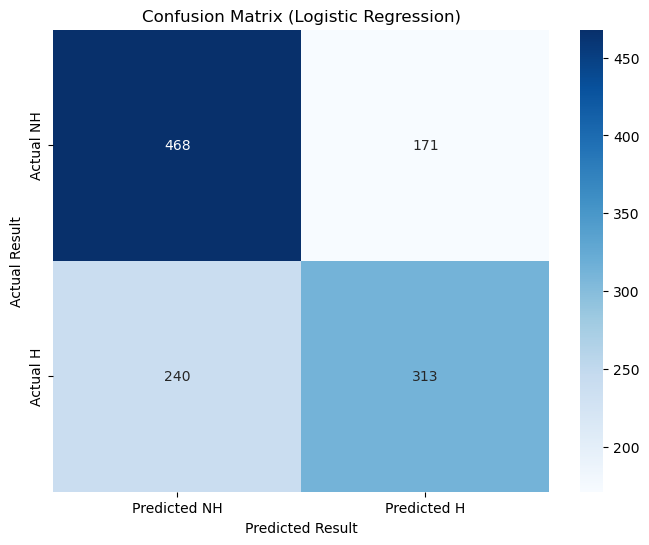

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Main script ---
print("--- Building Logistic Regression Model for 'Match Winner (FTR)' ---")

try:
    # 1. Load the trimmed data
    df = pd.read_excel("match_data_trimmed_outliers.xlsx")
    print(f"Loaded 'match_data_trimmed_outliers.xlsx': {df.shape}")

    # 2. Feature Engineering
    df['FTR_numeric'] = df['FTR'].map({'H': 1, 'NH': 0})
    y = df['FTR_numeric']
    X = df.drop(columns=['FTR', 'FTR_numeric'])
    X_processed = pd.get_dummies(X, drop_first=True)
    
    print("Feature engineering complete.")

    # 3. Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")

    # 4. --- NEW STEP: Scale the Data ---
    # Linear models (like Logistic Regression) require scaled features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Data has been scaled for the Logistic Regression model.")

    # 5. Train the Model (Logistic Regression)
    print("\nTraining LogisticRegression model...")
    # C=1.0 is a standard 'regularization' strength
    model_logistic = LogisticRegression(C=1.0, random_state=42, n_jobs=-1)
    model_logistic.fit(X_train_scaled, y_train)
    print("Model training complete.")

    # 6. Make Predictions
    y_pred = model_logistic.predict(X_test_scaled)
    
    # 7. Evaluate the Model
    print("\n--- Model Evaluation (Logistic Regression) ---")
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    
    # Full Classification Report
    print("\n--- Classification Report ---")
    print(classification_report(y_test, y_pred, target_names=['NH (0)', 'H (1)']))

    # 8. Feature Importance (Coefficients)
    print("\n--- Top 10 Most Important Features (Coefficients) ---")
    coefficients = model_logistic.coef_[0]
    
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': coefficients
    })
    
    # Sort by the *absolute value* of the coefficient
    importance_df['Absolute_Coefficient'] = importance_df['Coefficient'].abs()
    print(importance_df.sort_values(by='Absolute_Coefficient', ascending=False).head(10))
    print("\n(Positive coefficient = higher chance of Home Win 'H')")

    # 9. Visual Evaluation: Confusion Matrix
    print("\nPlotting Confusion Matrix...")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted NH', 'Predicted H'], 
                yticklabels=['Actual NH', 'Actual H'])
    plt.ylabel('Actual Result')
    plt.xlabel('Predicted Result')
    plt.title('Confusion Matrix (Logistic Regression)')
    plt.show()

except FileNotFoundError:
    print("Error: 'match_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_match_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# --- Main script ---
print("--- Tuning Logistic Regression Model for 'Match Winner (FTR)' ---")

try:
    # 1. Load the trimmed data
    df = pd.read_excel("match_data_trimmed_outliers.xlsx")
    print(f"Loaded 'match_data_trimmed_outliers.xlsx': {df.shape}")

    # 2. Feature Engineering (Same as before)
    df['FTR_numeric'] = df['FTR'].map({'H': 1, 'NH': 0})
    y = df['FTR_numeric']
    X = df.drop(columns=['FTR', 'FTR_numeric'])
    X_processed = pd.get_dummies(X, drop_first=True)
    
    # 3. Train-Test Split (Same as before)
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)
    
    # 4. Scale the Data (Same as before)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Training and Testing data has been scaled.")

    # 5. --- NEW: Hyperparameter Tuning ---
    print("\nStarting Hyperparameter Tuning with GridSearchCV...")
    print("This may take a moment...")
    
    # Define the model
    model = LogisticRegression(random_state=42, n_jobs=-1, max_iter=1000)
    
    # Define the "grid" of settings to test
    # 'C' is the regularization strength. Smaller 'C' = stronger regularization.
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'] # Test different solving algorithms
    }
    
    # Set up GridSearchCV
    # cv=5 means it will use 5-fold cross-validation
    # 'accuracy' is the score we want to maximize
    grid_search = GridSearchCV(estimator=model, 
                               param_grid=param_grid, 
                               cv=5, 
                               scoring='accuracy', 
                               n_jobs=-1)
    
    # Run the tuning process on the training data
    grid_search.fit(X_train_scaled, y_train)
    
    print("Tuning complete.")
    
    # 6. Get the Best Model
    print(f"\nBest settings found: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_ * 100:.2f}%")
    
    best_model = grid_search.best_estimator_
    
    # 7. Evaluate the *Best* Model on the Test Set
    y_pred = best_model.predict(X_test_scaled)
    
    print("\n--- FINAL Model Evaluation (Tuned Logistic Regression) ---")
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy on Test Set: {accuracy * 100:.2f}%")
    
    # Full Classification Report
    print("\n--- Classification Report ---")
    print(classification_report(y_test, y_pred, target_names=['NH (0)', 'H (1)']))

except FileNotFoundError:
    print("Error: 'match_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_match_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Tuning Logistic Regression Model for 'Match Winner (FTR)' ---
Loaded 'match_data_trimmed_outliers.xlsx': (5957, 22)
Training and Testing data has been scaled.

Starting Hyperparameter Tuning with GridSearchCV...
This may take a moment...
Tuning complete.

Best settings found: {'C': 1, 'solver': 'liblinear'}
Best cross-validation accuracy: 64.24%

--- FINAL Model Evaluation (Tuned Logistic Regression) ---
Model Accuracy on Test Set: 65.60%

--- Classification Report ---
              precision    recall  f1-score   support

      NH (0)       0.66      0.73      0.70       639
       H (1)       0.65      0.57      0.61       553

    accuracy                           0.66      1192
   macro avg       0.65      0.65      0.65      1192
weighted avg       0.66      0.66      0.65      1192



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


--- Building Classification Model for 'Match Winner (FTR)' ---
Loaded 'match_data_trimmed_outliers.xlsx': (5957, 22)
Feature engineering complete. All text columns converted to numbers.
Training data shape: (4765, 41)
Testing data shape: (1192, 41)

Training RandomForestClassifier model...
Model training complete.

--- Model Evaluation (Classification) ---
Model Accuracy: 63.84%

--- Classification Report ---
              precision    recall  f1-score   support

      NH (0)       0.64      0.74      0.69       639
       H (1)       0.63      0.53      0.57       553

    accuracy                           0.64      1192
   macro avg       0.64      0.63      0.63      1192
weighted avg       0.64      0.64      0.63      1192


Area Under the Curve (AUC) Score: 0.68

--- Top 10 Most Important Features ---
        Feature  Importance
9       DiffPts    0.087811
8          ATGD    0.083635
7          HTGD    0.081712
4           HTP    0.077854
5           ATP    0.074692
10  DiffForm

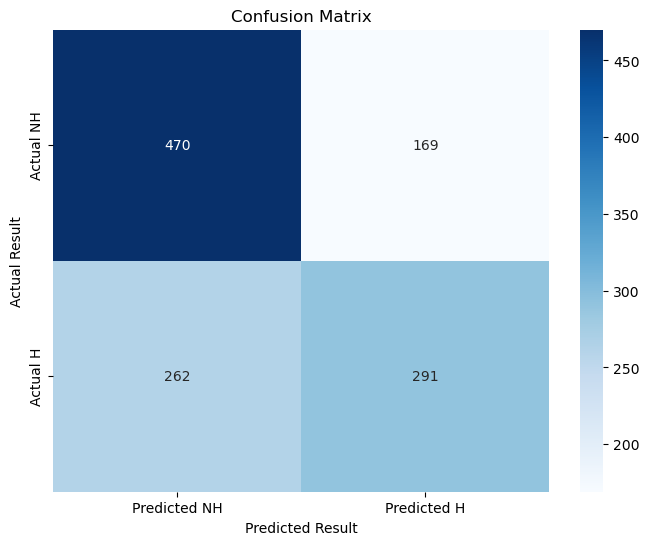


Plotting ROC-AUC Curve...


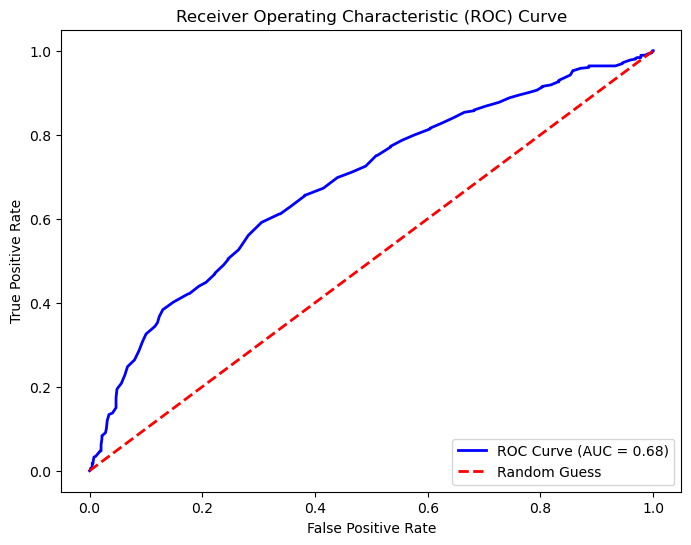

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score # <-- Added ROC imports

# --- Main script ---
print("--- Building Classification Model for 'Match Winner (FTR)' ---")

try:
    # 1. Load the trimmed data
    df = pd.read_excel("match_data_trimmed_outliers.xlsx")
    print(f"Loaded 'match_data_trimmed_outliers.xlsx': {df.shape}")

    # 2. Feature Engineering: Convert ALL categorical columns to numbers
    # We must one-hot encode all the 'HM' and 'AM' form columns,
    # as well as 'FTR' (which is our target).
    
    # First, let's create our target, 'y'
    # We'll map 'H' (Home Win) to 1 and 'NH' (Not Home Win) to 0
    df['FTR_numeric'] = df['FTR'].map({'H': 1, 'NH': 0})
    y = df['FTR_numeric']
    
    # Now, let's create our features, 'X'
    # We drop the original 'FTR' and our new target 'FTR_numeric'
    X = df.drop(columns=['FTR', 'FTR_numeric'])
    
    # One-hot encode all remaining text columns (HM1, AM1, etc.)
    X_processed = pd.get_dummies(X, drop_first=True)
    
    print("Feature engineering complete. All text columns converted to numbers.")

    # 3. Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")

    # 4. Train the Model (Using a Classifier)
    print("\nTraining RandomForestClassifier model...")
    # n_estimators=100 means it uses 100 "decision trees"
    model_match = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    model_match.fit(X_train, y_train)
    print("Model training complete.")

    # 5. Make Predictions on the Test Set
    y_pred = model_match.predict(X_test)
    
    # 6. Evaluate the Model
    print("\n--- Model Evaluation (Classification) ---")
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    
    # Full Classification Report (Precision, Recall, F1-Score)
    print("\n--- Classification Report ---")
    # '0' is 'NH' (Not Home Win), '1' is 'H' (Home Win)
    print(classification_report(y_test, y_pred, target_names=['NH (0)', 'H (1)']))

    # --- NEW: ROC-AUC Score ---
    # We need the model's *probability* predictions for the '1' class
    y_pred_proba = model_match.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nArea Under the Curve (AUC) Score: {auc:.2f}")

    # 7. Feature Importance (The "Why")
    print("\n--- Top 10 Most Important Features ---")
    importances = model_match.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    print(importance_df.head(10))

    # 8. Visual Evaluation: Confusion Matrix
    print("\nPlotting Confusion Matrix...")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted NH', 'Predicted H'], 
                yticklabels=['Actual NH', 'Actual H'])
    plt.ylabel('Actual Result')
    plt.xlabel('Predicted Result')
    plt.title('Confusion Matrix')
    plt.show()

    # --- NEW: 9. Plot ROC-AUC Curve ---
    print("\nPlotting ROC-AUC Curve...")
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

except FileNotFoundError:
    print("Error: 'match_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_match_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")